<a href="https://colab.research.google.com/github/Jacklinekiarie/Final-Project/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                       ** CNN Model** 
Model that detect and classify tomato leaves. Used CNN algorithm to create a model which can classify tomatoes disease based on the trained dataset. I have 10 classes of disease which i used to train my model with. I divided my dataset into three categories that is train data with 16,666 images, test data with 4585 images and validation data with 330 images. 

Import libraries required.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot  as plt
from matplotlib.pyplot import*

Mount model to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image size(200,200) and batch size is 32 . Initialize the images

In [ ]:
img_height, img_width=[200,200]
batch_size= 32
train_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/train',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)
test_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/test',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)

val_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/validation',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)


Found 16666 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.
Found 330 files belonging to 10 classes.


Visualize the images used.

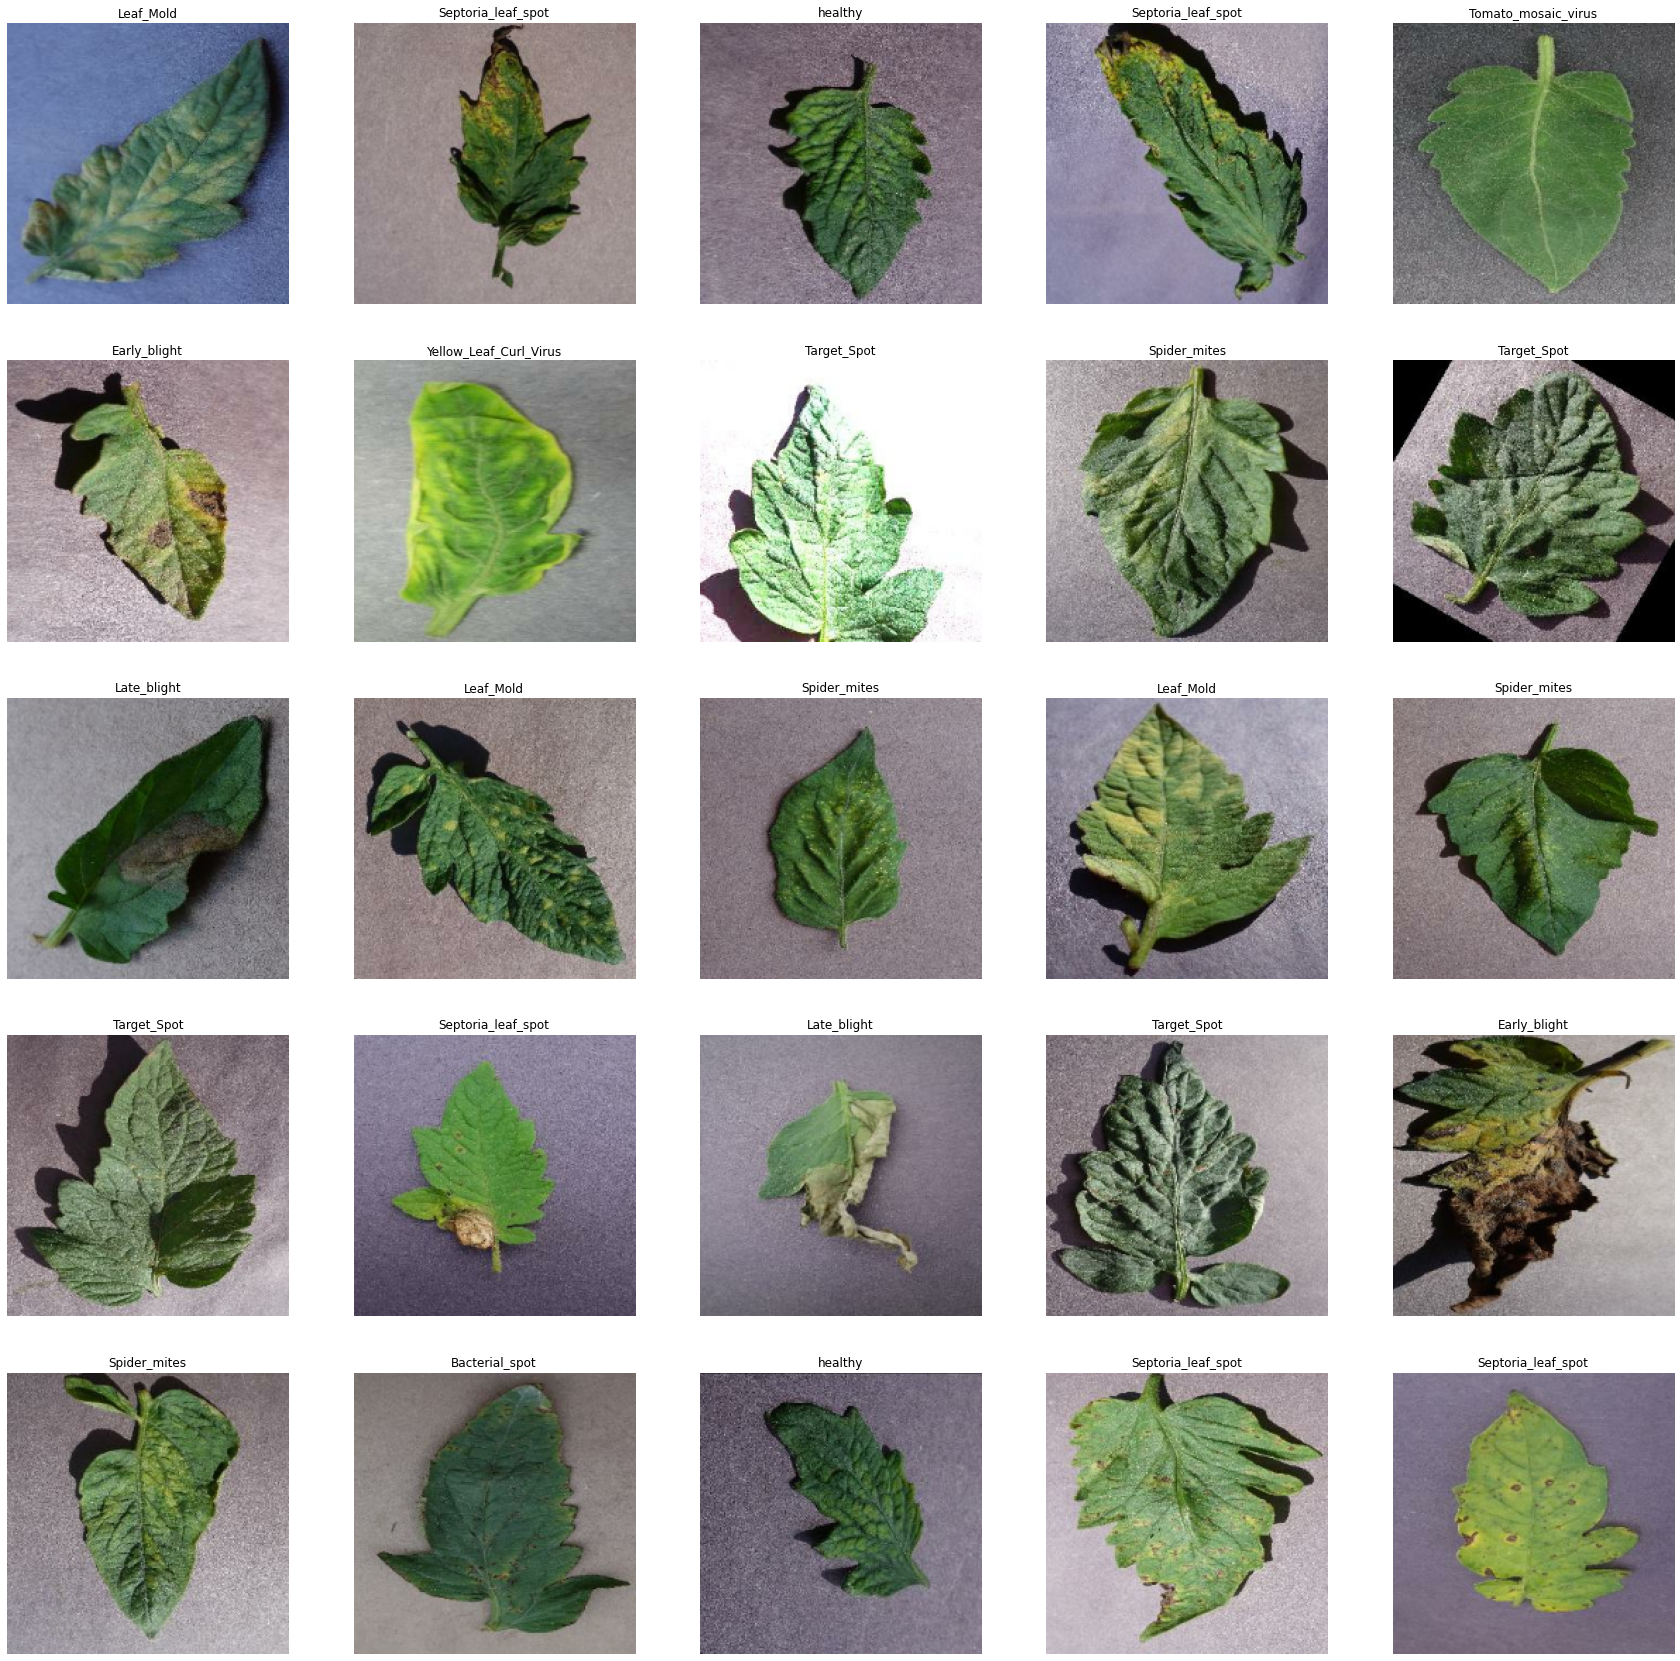

In [ ]:
class_names=["Bacterial_spot",
"Early_blight",
"Late_blight",
"Leaf_Mold",
"Septoria_leaf_spot",
"Spider_mites",
"Target_Spot",
"Yellow_Leaf_Curl_Virus",
"Tomato_mosaic_virus",
"healthy"]


plt.figure(figsize=(30,30)) 

for images, labels in train_ds.take(1):
  
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



Create Model

In [ ]:
import keras
from tensorflow.keras import utils as np_utils
from tensorflow.keras import datasets ,layers ,models
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.layers import Flatten
model = Sequential([
            
    Conv2D(filters=32,kernel_size=(3,3),  input_shape = (200, 200, 3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(101, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)       

Compile the model

In [ ]:
model.compile(
    optimizer="adam",
    loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Train the created model.

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_ds,validation_data=val_ds, epochs=10,callbacks=[callback])

Epoch 1/10
521/521 [==============================] - 792s 2s/step - loss: 6.9362 - accuracy: 0.2351 - val_loss: 1.8506 - val_accuracy: 0.4152
Epoch 2/10
521/521 [==============================] - 788s 2s/step - loss: 1.1947 - accuracy: 0.5859 - val_loss: 0.9875 - val_accuracy: 0.6727
Epoch 3/10
521/521 [==============================] - 781s 1s/step - loss: 0.8434 - accuracy: 0.7040 - val_loss: 0.7120 - val_accuracy: 0.7545
Epoch 4/10
521/521 [==============================] - 778s 1s/step - loss: 0.6667 - accuracy: 0.7670 - val_loss: 0.7025 - val_accuracy: 0.7697
Epoch 5/10
521/521 [==============================] - 781s 1s/step - loss: 0.5843 - accuracy: 0.7950 - val_loss: 0.6639 - val_accuracy: 0.7545
Epoch 6/10
521/521 [==============================] - 779s 1s/step - loss: 0.4631 - accuracy: 0.8401 - val_loss: 0.5693 - val_accuracy: 0.7727
Epoch 7/10
521/521 [==============================] - 784s 2s/step - loss: 0.4291 - accuracy: 0.8489 - val_loss: 0.5910 - val_accuracy: 0.8000

Evaluate the trained model by testing the accuracy to the test data

In [ ]:
model.evaluate(test_ds)

144/144 [==============================] - 826s 5s/step - loss: 0.4998 - accuracy: 0.8478


[0.4998156428337097, 0.8477644324302673]

Visualize the accuracy by plotting a graph of accurracy  and validation accurracy

144/144 - 56s - loss: 0.4998 - accuracy: 0.8478 - 56s/epoch - 392ms/step


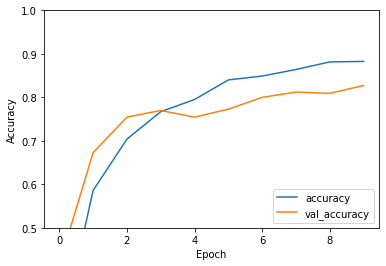

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

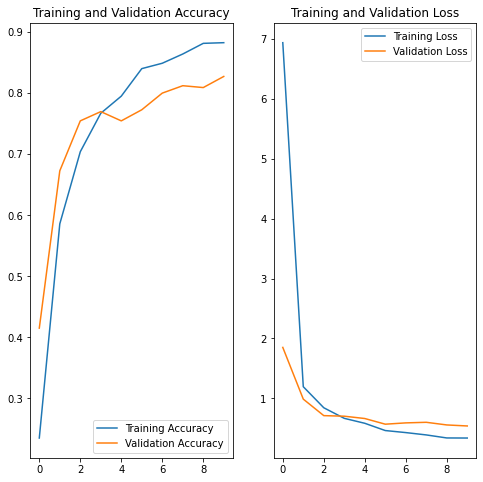

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Evaluate the model by predicting the disease using the already trained model. The predicted disease and the real disease. Validate the model

In [ ]:
import numpy

plt.figure(figsize=(30,30))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

After the model is built succeffully,  Convert the model into model.tflite later to deploy in and android application.

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)